In [1]:
# Dependencies and boilerplate
import pandas as pd
import matplotlib.pyplot as plt

from sqlalchemy import Column, Float, Integer, String
from sqlalchemy.ext.automap import automap_base

from sqlalchemy import create_engine
from sqlalchemy.orm import Session

import pymysql
pymysql.install_as_MySQLdb()

from sqlalchemy import and_, or_
from sqlalchemy import func

In [2]:
# Create an engine connecting to the SQLite database file
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'stations']

In [4]:
# Assign the measurement class to a variable called `Measurement`
Measurement = Base.classes.measurement

In [5]:
# Assign the stations class to a variable called `Stations`
Stations = Base.classes.stations

In [23]:
# Create a session
session = Session(bind = engine)

# Select prcp & date for the last 12 months
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2017-01-01')

2017-01-01 0.0
2017-01-02 0.0
2017-01-03 0.0
2017-01-04 0.0
2017-01-05 0.0
2017-01-06 0.0
2017-01-07 0.0
2017-01-08 0.0
2017-01-09 0.0
2017-01-10 0.0
2017-01-11 0.0
2017-01-12 0.0
2017-01-13 0.0
2017-01-14 0.0
2017-01-15 0.0
2017-01-16 0.0
2017-01-17 0.0
2017-01-18 0.0
2017-01-19 0.0
2017-01-20 0.0
2017-01-21 0.0
2017-01-22 0.16
2017-01-23 0.0
2017-01-24 0.04
2017-01-25 0.03
2017-01-26 0.0
2017-01-27 0.0
2017-01-28 0.0
2017-01-29 0.18
2017-01-30 0.0
2017-01-31 0.0
2017-02-01 0.0
2017-02-02 0.0
2017-02-03 0.0
2017-02-04 0.0
2017-02-05 0.0
2017-02-06 0.0
2017-02-07 0.51
2017-02-08 0.0
2017-02-09 0.0
2017-02-10 0.0
2017-02-11 0.31
2017-02-12 2.62
2017-02-13 0.01
2017-02-14 0.0
2017-02-15 0.0
2017-02-16 0.07
2017-02-17 0.0
2017-02-18 0.0
2017-02-19 0.0
2017-02-20 0.0
2017-02-21 0.06
2017-02-22 0.06
2017-02-23 0.01
2017-02-24 0.0
2017-02-25 0.03
2017-02-26 0.0
2017-02-27 0.0
2017-02-28 0.0
2017-03-01 1.19
2017-03-02 0.73
2017-03-03 0.47
2017-03-04 0.0
2017-03-05 0.35
2017-03-06 0.0
2017-03-

2017-05-01 0.07
2017-05-02 0.0
2017-05-03 0.0
2017-05-04 0.0
2017-05-05 0.0
2017-05-06 0.0
2017-05-07 0.0
2017-05-08 0.0
2017-05-09 0.68
2017-05-10 0.06
2017-05-11 0.0
2017-05-12 0.0
2017-05-13 0.0
2017-05-14 0.0
2017-05-15 0.06
2017-05-16 0.0
2017-05-17 0.0
2017-05-18 0.46
2017-05-21 0.0
2017-05-22 0.0
2017-05-23 0.0
2017-05-24 0.61
2017-05-25 0.55
2017-05-26 0.0
2017-05-27 0.0
2017-05-28 0.0
2017-05-29 0.0
2017-05-30 0.11
2017-05-31 0.0
2017-06-01 0.0
2017-06-02 0.0
2017-06-03 0.15
2017-06-04 0.0
2017-06-05 0.0
2017-06-06 0.0
2017-06-07 0.0
2017-06-08 0.0
2017-06-09 0.0
2017-06-10 0.13
2017-06-11 0.25
2017-06-12 0.14
2017-06-13 0.03
2017-06-14 0.06
2017-06-15 0.0
2017-06-16 0.0
2017-06-17 0.0
2017-06-18 0.0
2017-06-19 0.01
2017-06-22 0.0
2017-06-23 0.05
2017-06-24 0.0
2017-06-25 0.0
2017-06-26 0.0
2017-06-27 0.0
2017-06-28 0.0
2017-06-29 0.0
2017-06-30 0.07
2017-07-03 0.02
2017-07-06 0.0
2017-07-07 0.0
2017-07-08 0.0
2017-07-09 0.0
2017-07-10 0.0
2017-07-11 0.0
2017-07-12 0.0
2017-07

In [32]:
# create empty dict to populate
data = {'date': [], 'prcp': []}

# populate dict with rows from results
for row in results:
    data['date'].append(row.date)
    data['prcp'].append(row.prcp)

# create pandas df from dict
prcp17 = pd.DataFrame(data['prcp'], columns = ['precipitation'], index = data['date'])
print(prcp17.head())

            precipitation
2017-01-01            0.0
2017-01-02            0.0
2017-01-03            0.0
2017-01-04            0.0
2017-01-05            0.0


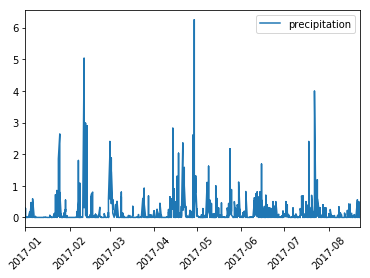

In [34]:
# plot prcp17
prcp17.plot(rot=45)
plt.show()

In [35]:
prcp17.describe()

,precipitation
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


In [42]:
# query to find unique stations
results = session.query(Measurement.station).distinct()
count = 0
for row in results:
    count +=1
print(f'There are {count} unique stations')

There are 9 unique stations


In [66]:
# query the number of observations for each station & return in descending order
result = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).all()

print(result)

[('USC00519281', 2772), ('USC00513117', 2696), ('USC00519397', 2685), ('USC00519523', 2572), ('USC00516128', 2484), ('USC00514830', 1937), ('USC00511918', 1932), ('USC00517948', 683), ('USC00518838', 342)]


In [69]:
# return station with highest number of observations
print(f'Station {result[0][0]} has the highest number of observations')

Station USC00519281 has the highest number of observations


In [71]:
# query the number of observations for each station & return in descending order for 2017
result = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).filter(Measurement.date >= '2017-01-01').all()

print(result)

[('USC00519397', 230), ('USC00519281', 221), ('USC00513117', 212), ('USC00516128', 204), ('USC00519523', 190), ('USC00514830', 167), ('USC00517948', 43)]


In [99]:
# query the last 12 months of tobs data, filtering by the station with the highest number of observations
tobs17 = session.query(Measurement.tobs).\
filter(Measurement.date >= '2017-01-01').filter(Measurement.station == 'USC00519397').all()
print(tobs17)

[(62,), (66,), (63,), (62,), (63,), (64,), (66,), (60,), (64,), (63,), (78,), (67,), (67,), (65,), (66,), (67,), (66,), (72,), (73,), (71,), (72,), (72,), (72,), (69,), (72,), (71,), (65,), (64,), (67,), (67,), (68,), (70,), (61,), (65,), (72,), (73,), (76,), (64,), (62,), (61,), (71,), (69,), (68,), (74,), (75,), (75,), (71,), (71,), (68,), (69,), (71,), (70,), (72,), (74,), (70,), (64,), (65,), (72,), (74,), (66,), (73,), (69,), (74,), (71,), (69,), (68,), (71,), (72,), (68,), (71,), (74,), (71,), (71,), (71,), (70,), (72,), (69,), (73,), (75,), (75,), (74,), (70,), (73,), (76,), (76,), (75,), (77,), (76,), (77,), (76,), (76,), (76,), (77,), (76,), (78,), (77,), (77,), (77,), (72,), (75,), (79,), (78,), (77,), (75,), (73,), (74,), (74,), (75,), (74,), (78,), (73,), (76,), (77,), (77,), (77,), (77,), (78,), (76,), (72,), (63,), (75,), (78,), (78,), (78,), (79,), (79,), (79,), (77,), (78,), (78,), (79,), (79,), (77,), (78,), (78,), (78,), (73,), (76,), (78,), (76,), (77,), (87,), (77,)

In [102]:
# create pandas df from tobs17
tobs17df = pd.DataFrame.from_records(tobs17, columns = ['tobs'])
tobs17df.head()

,tobs
0,62
1,66
2,63
3,62
4,63


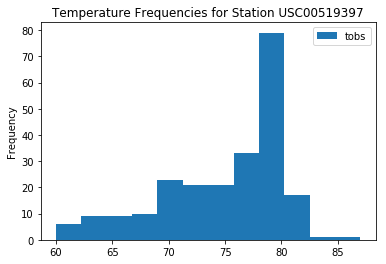

In [105]:
# plot temperature frequency
tobs17df.plot.hist('tobs', bins = 12, title = "Temperature Frequencies for Station USC00519397")
plt.show()

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

In [109]:
# store data from calc_temps fxn
temps = calc_temps('2012-02-28', '2012-03-05')
temps

[(65, 70.11363636363636, 74)]

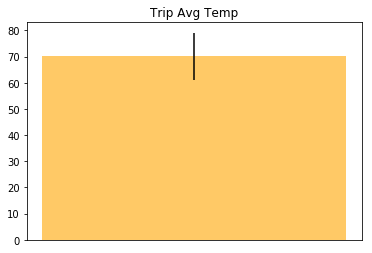

In [133]:
t_err = temps[0][2] - temps[0][0]
plt.bar(0, temps[0][1], 0.4, yerr = t_err, color = "orange", alpha = 0.6)
plt.axes().get_xaxis().set_visible(False)
plt.title('Trip Avg Temp')
plt.show()

ValueError: Invalid RGBA argument: 'd'